## 0.0 IMPORTS

In [1]:
import pandas as pd
import numpy as np
import inflection
import math
import seaborn as sns
import matplotlib.pyplot as plt

from IPython.display  import Image
from IPython.core.display  import HTML
import datetime

### 0.1 Helper Functions

In [2]:
def jupyter_settings():
    %matplotlib inline
    %pylab inline
    plt.style.use( 'bmh' )
    plt.rcParams['figure.figsize'] = [25, 12]
    plt.rcParams['font.size'] = 24
    display( HTML( '<style>.container { width:100% !important; }</style>') )
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option( 'display.expand_frame_repr', False )
    sns.set()

In [3]:
jupyter_settings()

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


### 0.2 Loading data

In [4]:
df_sales_raw = pd.read_csv('data/train.csv', low_memory= False)
df_store_raw = pd.read_csv('data/store.csv', low_memory= False)

#merge
df_raw = pd.merge(df_sales_raw, df_store_raw, how='left', on='Store')

# 1.0 Descriçao dos dados

In [5]:
df1 = df_raw.copy()

## 1.1 Rename Columns

In [6]:
df1.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

In [7]:
cols_old = ['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval']

snakecase = lambda x: inflection.underscore( x )

cols_new = list(map(snakecase, cols_old))

#raname

df1.columns = cols_new

## 1.2 Data Dimensions

In [8]:
print(f'Number of rows: {df1.shape[0]}')
print(f'Number of Cols: {df1.shape[1]}')

Number of rows: 1017209
Number of Cols: 18


## 1.3 Data Types

In [9]:
# df1.dtypes   / Coluna date foi importada como 'object'

df1['date'] = pd.to_datetime(df1['date'])

df1.dtypes

store                                    int64
day_of_week                              int64
date                            datetime64[ns]
sales                                    int64
customers                                int64
open                                     int64
promo                                    int64
state_holiday                           object
school_holiday                           int64
store_type                              object
assortment                              object
competition_distance                   float64
competition_open_since_month           float64
competition_open_since_year            float64
promo2                                   int64
promo2_since_week                      float64
promo2_since_year                      float64
promo_interval                          object
dtype: object

## 1.4 Check NA


In [10]:
df1.isna().sum()

store                                0
day_of_week                          0
date                                 0
sales                                0
customers                            0
open                                 0
promo                                0
state_holiday                        0
school_holiday                       0
store_type                           0
assortment                           0
competition_distance              2642
competition_open_since_month    323348
competition_open_since_year     323348
promo2                               0
promo2_since_week               508031
promo2_since_year               508031
promo_interval                  508031
dtype: int64

## 1.5. Fillout NA

In [11]:
#competition_distance

df1['competition_distance']= df1['competition_distance'].apply(lambda x: 200000.0 if math.isnan(x) else x)

#competition_open_since_month

df1['competition_open_since_month']= df1.apply(lambda x: x['date'].month if math.isnan(x['competition_open_since_month']) else x['competition_open_since_month'], axis = 1)

#competition_open_since_year 

df1['competition_open_since_year']= df1.apply(lambda x: x['date'].year if math.isnan(x['competition_open_since_year']) else x['competition_open_since_year'], axis = 1)

#promo2                        

#promo2_since_week

df1['promo2_since_week']= df1.apply(lambda x: x['date'].week if math.isnan(x['promo2_since_week']) else x['promo2_since_week'], axis = 1)          

#promo2_since_year

df1['promo2_since_year']= df1.apply(lambda x: x['date'].year if math.isnan(x['promo2_since_year']) else x['promo2_since_year'], axis = 1)            

#promo_interval

month_map = {1: 'Jan',  2: 'Fev',  3: 'Mar',  4: 'Apr',  5: 'May',  6: 'Jun',  7: 'Jul',  8: 'Aug',  9: 'Sep',  10: 'Oct', 11: 'Nov', 12: 'Dec'}

df1['promo_interval'].fillna(0, inplace=True )

df1['month_map'] = df1['date'].dt.month.map( month_map )

df1['is_promo'] = df1[['promo_interval', 'month_map']].apply( lambda x: 0 if x['promo_interval'] == 0 else 1 if x['month_map'] in x['promo_interval'].split( ',' ) else 0, axis=1 )



## 1.6. Change Types

In [12]:
df1.dtypes

store                                    int64
day_of_week                              int64
date                            datetime64[ns]
sales                                    int64
customers                                int64
open                                     int64
promo                                    int64
state_holiday                           object
school_holiday                           int64
store_type                              object
assortment                              object
competition_distance                   float64
competition_open_since_month           float64
competition_open_since_year            float64
promo2                                   int64
promo2_since_week                      float64
promo2_since_year                      float64
promo_interval                          object
month_map                               object
is_promo                                 int64
dtype: object

In [13]:
df1['competition_open_since_month'] = df1['competition_open_since_month'].astype( int )
df1['competition_open_since_year'] = df1['competition_open_since_year'].astype( int )

df1['promo2_since_week'] = df1['promo2_since_week'].astype( int )
df1['promo2_since_year'] = df1['promo2_since_year'].astype( int )


## 1.6. Descriptive Statistical

In [14]:
df1.describe()

,store,day_of_week,sales,customers,open,promo,school_holiday,competition_distance,competition_open_since_month,competition_open_since_year,promo2,promo2_since_week,promo2_since_year,is_promo
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01,5.935443e+03,6.786849e+00,2.010325e+03,5.005638e-01,2.361903e+01,2.012793e+03,1.552306e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01,1.254765e+04,3.311087e+00,5.515593e+00,4.999999e-01,1.431006e+01,1.662658e+00,3.621246e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+01,1.000000e+00,1.900000e+03,0.000000e+00,1.000000e+00,2.009000e+03,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00,7.100000e+02,4.000000e+00,2.008000e+03,0.000000e+00,1.200000e+01,2.012000e+03,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00,2.330000e+03,7.000000e+00,2.012000e+03,1.000000e+00,2.200000e+01,2.013000e+03,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00,6.910000e+03,1.000000e+01,2.014000e+03,1.000000e+00,3.700000e+01,2.014000e+03,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00,2.000000e+05,1.200000e+01,2.015000e+03,1.000000e+00,5.200000e+01,2.015000e+03,1.000000e+00


In [15]:
num_atributes = df1.select_dtypes(include= ['int64', 'float64'])
cat_atributes = df1.select_dtypes(exclude = ['int64', 'float64','datetime64[ns]'])

In [16]:
# Central Tendency - mean, median
ct1 = pd.DataFrame (num_atributes.apply(np.mean)).T
ct2 = pd.DataFrame (num_atributes.apply(np.median)).T


# Dispersion std, min, range, skew, kurtosis

d1 = pd.DataFrame (num_atributes.apply (np.std)).T
d2 = pd.DataFrame (num_atributes.apply( min)).T
d3 = pd.DataFrame (num_atributes.apply( max)).T
d4 = pd.DataFrame (num_atributes.apply(lambda x: x.max() - x.min())).T
d5 = pd.DataFrame (num_atributes.apply(lambda x: x.skew())).T
d6 = pd.DataFrame (num_atributes.apply(lambda x: x.kurtosis())).T

# concatenete
m = pd.concat ([d2,d3,d4,ct1,ct2,d1,d5,d6]).T.reset_index()
m.columns = ['attributes','min','max','range','mean','median','std','skew','kurtosis']

In [17]:
m

,attributes,min,max,range,mean,median,std,skew,kurtosis
0,store,1.0,1115.0,1114.0,558.429727,558.0,321.908493,-0.000955,-1.200524
1,day_of_week,1.0,7.0,6.0,3.998341,4.0,1.997390,0.001593,-1.246873
2,sales,0.0,41551.0,41551.0,5773.818972,5744.0,3849.924283,0.641460,1.778375
3,customers,0.0,7388.0,7388.0,633.145946,609.0,464.411506,1.598650,7.091773
4,open,0.0,1.0,1.0,0.830107,1.0,0.375539,-1.758045,1.090723
5,promo,0.0,1.0,1.0,0.381515,0.0,0.485758,0.487838,-1.762018
6,school_holiday,0.0,1.0,1.0,0.178647,0.0,0.383056,1.677842,0.815154
7,competition_distance,20.0,200000.0,199980.0,5935.442677,2330.0,12547.646829,10.242344,147.789712
8,competition_open_since_month,1.0,12.0,11.0,6.786849,7.0,3.311085,-0.042076,-1.232607
9,competition_open_since_year,1900.0,2015.0,115.0,2010.324840,2012.0,5.515591,-7.235657,124.071304


In [18]:
cat_atributes.apply(lambda x: x.unique().shape[0])

state_holiday      4
store_type         4
assortment         3
promo_interval     4
month_map         12
dtype: int64

<AxesSubplot:xlabel='assortment', ylabel='sales'>

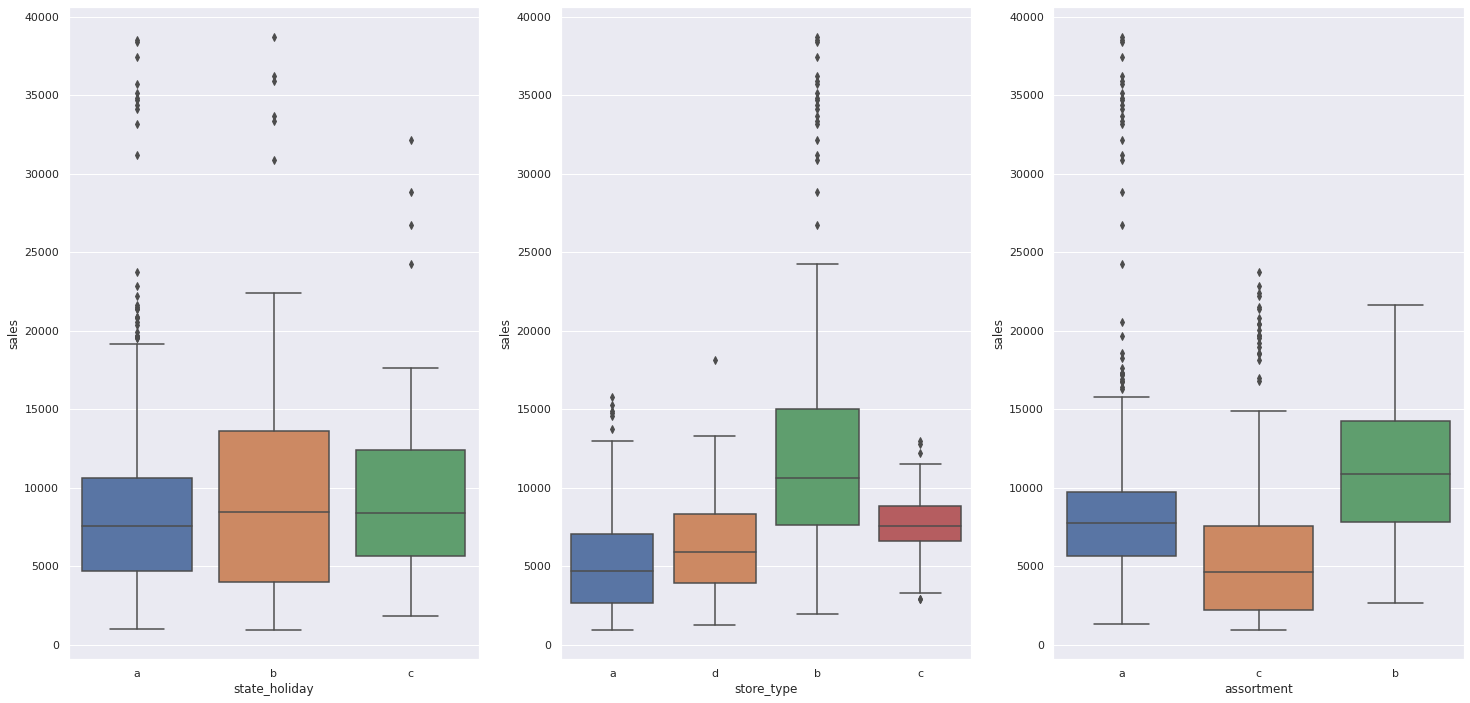

In [19]:
aux1 = df1[(df1['state_holiday'] !='0') & (df1['sales'] > 0)]



plt.subplot(131)
sns.boxplot(x = 'state_holiday', y='sales', data= aux1)

plt.subplot(132)
sns.boxplot(x = 'store_type', y='sales', data= aux1)

plt.subplot(133)
sns.boxplot(x = 'assortment', y='sales', data= aux1)

# 2.0 Feature Enginnering

In [20]:
df2 = df1.copy()

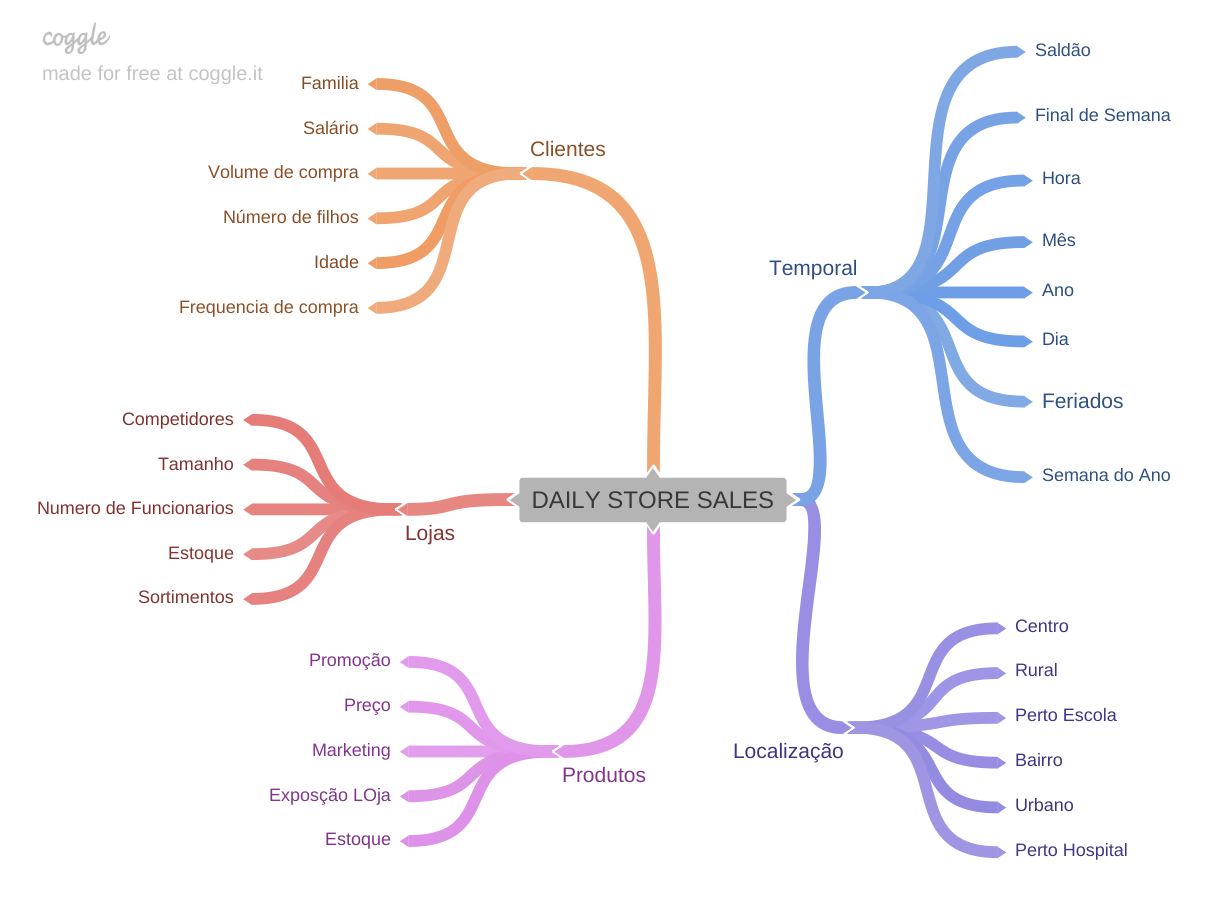

In [21]:
Image('imagem/MapaMentalHiposteses.png')

## 2.1 Mapa Mental de Hipoteses

### 2.1.1 Hipoteses da Loja

**1.** Lojas com maior quadro de funcionarios deveriam vender mais.

**2.** Lojas com maior estoque deveriam vender mais.

**3.** Lojas com maior porte deveriam vender mais

**4.** Lojas com menor porte deveriam vender menos.

**5.** Lojas com maior sortimento deveriam vender mais.

### 2.1.2 Hipoteses da Produto

**1.** Lojas que investem mais em Markering deveriam vender mais.

**2.** Lojas que expoe mais os produtos nas vitrines deveriam vender mais.

**3.** Lojas com precos menores nos produtos deveriam vender mais.

**4.** Lojas que tem precos menores por mais tempo nos produtos deveriam vender mais.



### 2.1.3 Hipoteses Tempo


**1.** Lojas que tem mais feriados deveriam vender menos

**2.** Lojas que abrem nos finais de semana deveriam vender mais

**3.** Lojas que abrem nos primeiros 6 meses deveriam vender mais.





## 2.1 Mapa Final de Hipoteses

**1.** Lojas com maior sortimentos deveriam vender mais.

**2.** Lojas com competidores mais próximos deveriam vender menos.

**3.** Lojas com competidores à mais tempo deveriam vendem mais.

**4.** Lojas com promoções ativas por mais tempo deveriam vender mais.

**5.** Lojas com mais dias de promoção deveriam vender mais.

**7.** Lojas com mais promoções consecutivas deveriam vender mais.

**8.** Lojas abertas durante o feriado de Natal deveriam vender mais.

**9.** Lojas deveriam vender mais ao longo dos anos.

**10.** Lojas deveriam vender mais no segundo semestre do ano.

**11.** Lojas deveriam vender mais depois do dia 10 de cada mês.

**12.** Lojas deveriam vender menos aos finais de semana.

**13.** Lojas deveriam vender menos durante os feriados escolares.


## 2.3 Feature Enginnering

In [22]:
#year
df2['year'] = df2['date'].dt.year
#month
df2['month'] = df2['date'].dt.month
#day
df2['day'] = df2['date'].dt.day
#week of year
df2['week_of_year'] = df2['date'].dt.isocalendar().week
#year week
df2['year_week'] = df2['date'].dt.strftime('%Y-%W')

#competition since
df2['competition_since'] = df2.apply( lambda x: datetime.datetime( year=x['competition_open_since_year'], month=x['competition_open_since_month'],day=1 ), axis=1 )
df2['competition_time_month'] = ( ( df2['date'] - df2['competition_since'] )/30 ).apply( lambda x: x.days ).astype( int )

#promo since
df2['promo_since'] = df2['promo2_since_year'].astype( str ) + '-' + df2['promo2_since_week'].astype( str ) 
df2['promo_since'] = df2['promo_since'].apply(lambda x : datetime.datetime.strptime(x + '-1', '%Y-%W-%w') - datetime.timedelta( days = 7))
df2['promo_time_week'] = ( ( df2['date'] - df2['promo_since']) /7 ).apply(lambda x : x.days).astype( int )

#assortment
df2['assortment'] = df2['assortment'].apply(lambda x: 'basic' if x == 'a' else 'extra' if x == 'b' else 'extended')

#state holiday
df2['state_holiday'] = df2['state_holiday'].apply(lambda x: 'public_holiday' if x == 'a' else 'easter_holiday' if x == 'b' else 'christmas' if x== 'c' else 'regular_day')


## 3.0. PASSO 03 - FILTRAGEM DE VARIÁVEIS

In [23]:
df3 = df2.copy()

In [24]:
df3['assortment'].value_counts()

basic       537445
extended    471470
extra         8294
Name: assortment, dtype: int64

### 3.1. PASSO 03 - FILTRAGEM DAS LINHAS

In [25]:
df3 = df3[(df3['open'] != 0) & (df3['sales'] > 0 )]

### 3.0. PASSO 03 - FILTRAGEM DE COLUNAS

In [26]:
cols_drop = ["customers", 'open', 'promo_interval', 'month_map']

In [27]:
df3.drop(cols_drop, axis=1, inplace=True)

In [28]:
df3.shape

(844338, 25)

## 4.0. PASSO 04 - ANÁLISE EXPLORATÓRIA DE DADOS

In [29]:
df4 = df3.copy()

### 4.1. PASSO 04 - ANÁLISE UNIVARIADA

#### 4.1.1 RESPONSE VARIABLE

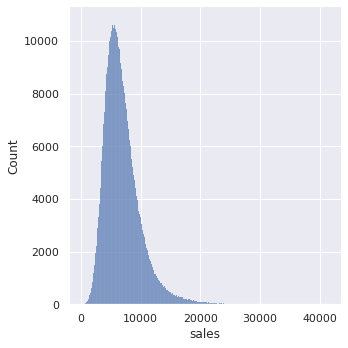

In [30]:
sns.displot(df4['sales'])

#### 4.1.1 NUMERICAL VARIABLE

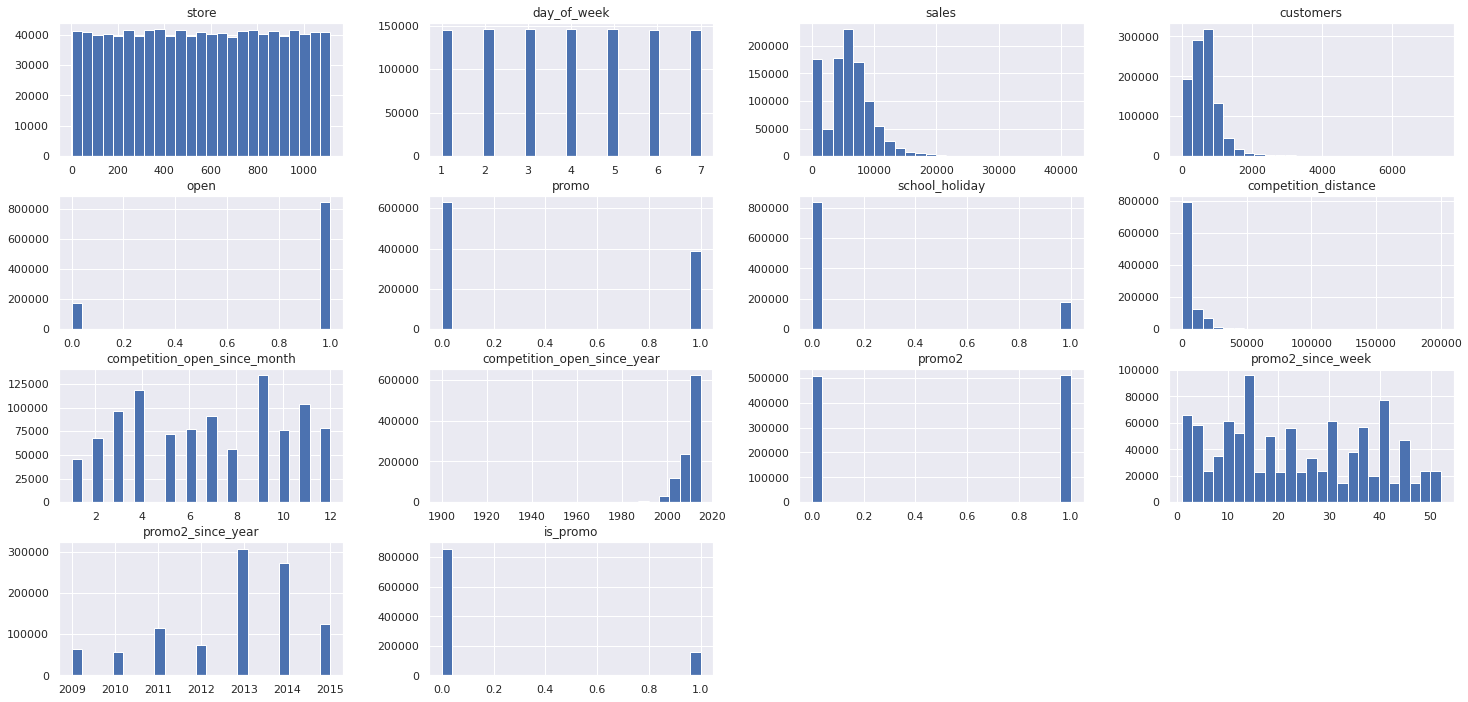

In [31]:

num_atributes.hist(bins=25);

#### 4.1.3 CATEGORICAL VARIABLE

/home/igor/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/igor/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/igor/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


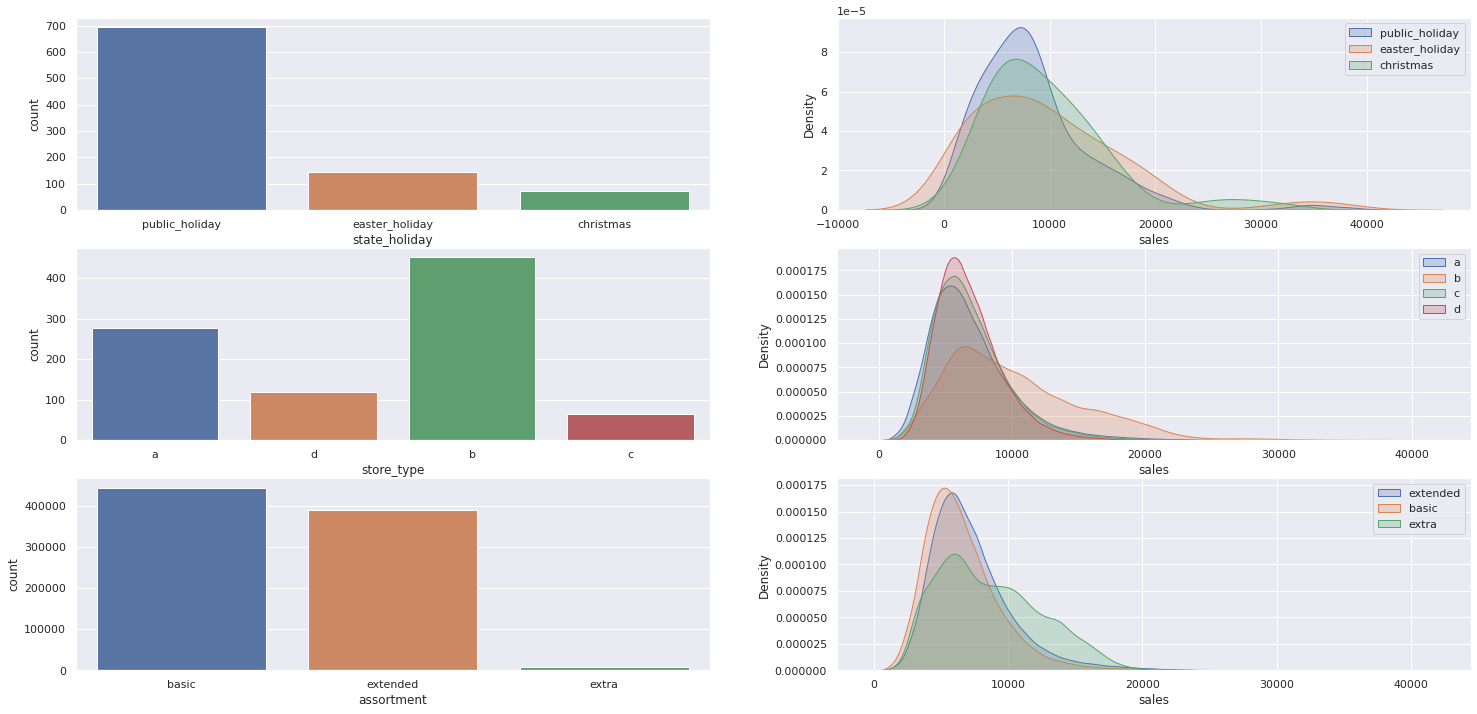

In [32]:
# state_holiday
plt.subplot(321)
a = df4[df4['state_holiday'] != 'regular_day']
sns.countplot(a['state_holiday'])

plt.subplot(322)

sns.kdeplot(df4[df4['state_holiday'] == 'public_holiday']['sales'], label = 'public_holiday', shade=True)
sns.kdeplot(df4[df4['state_holiday'] == 'easter_holiday']['sales'], label = 'easter_holiday', shade=True)
sns.kdeplot(df4[df4['state_holiday'] == 'christmas']['sales'], label = 'christmas', shade=True)
plt.legend()

#story_type
plt.subplot(323)
sns.countplot(a['store_type'])

plt.subplot(324)
sns.kdeplot(df4[df4['store_type'] == 'a']['sales'], label = 'a', shade=True)
sns.kdeplot(df4[df4['store_type'] == 'b']['sales'], label = 'b', shade=True)
sns.kdeplot(df4[df4['store_type'] == 'c']['sales'], label = 'c', shade=True)
sns.kdeplot(df4[df4['store_type'] == 'd']['sales'], label = 'd', shade=True)
plt.legend()
#assortment
plt.subplot(325)
sns.countplot(df4['assortment'])



plt.subplot(326)

sns.kdeplot(df4[df4['assortment'] == 'extended']['sales'], label ='extended', shade=True)
sns.kdeplot(df4[df4['assortment'] == 'basic']['sales'], label ="basic", shade=True)
sns.kdeplot(df4[df4['assortment'] == 'extra']['sales'], label = 'extra', shade=True)
plt.legend()



### 4.2 PASSO 04 - ANÁLISE BIVARIADA

#### 1. Lojas com maior sortimentos deveriam vender mais.

**Falsa** Lojas com MAIOR SORTIMENTO vendem MENOS.

<AxesSubplot:xlabel='year_week'>

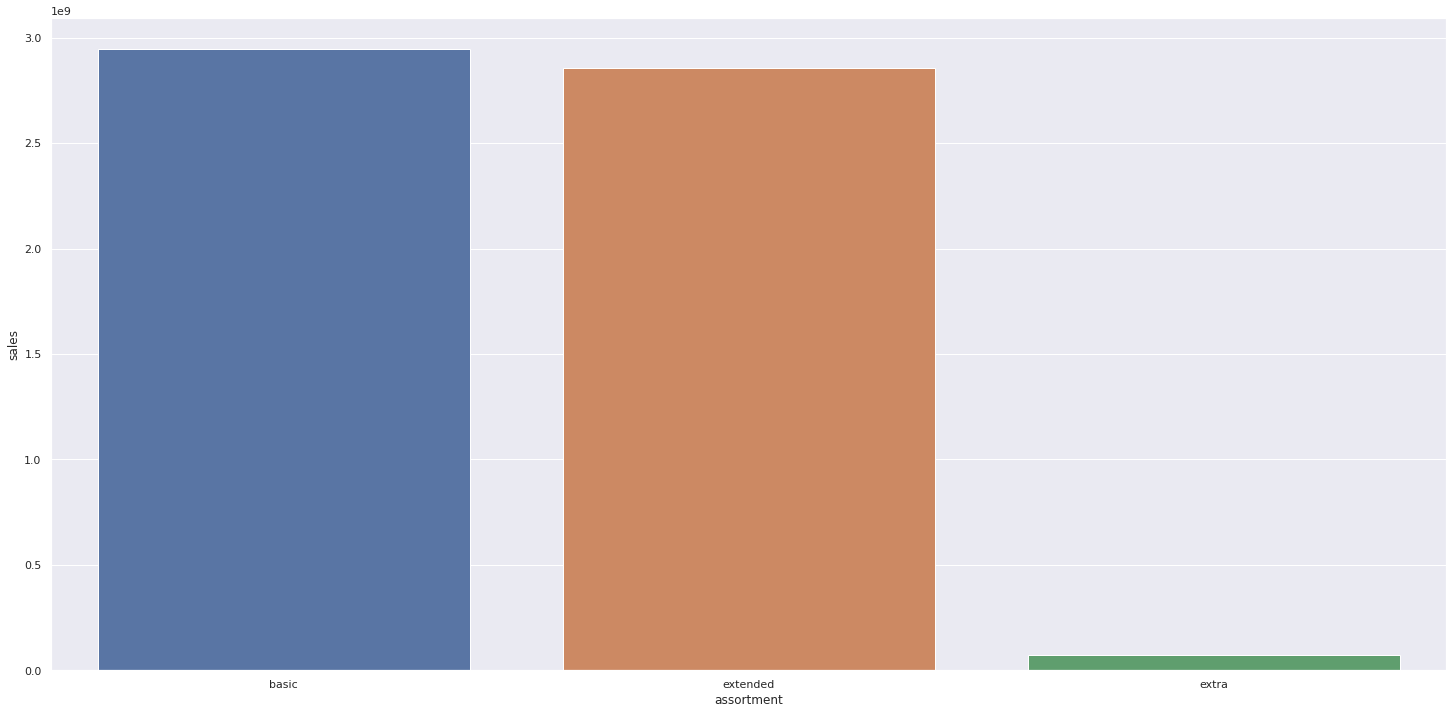

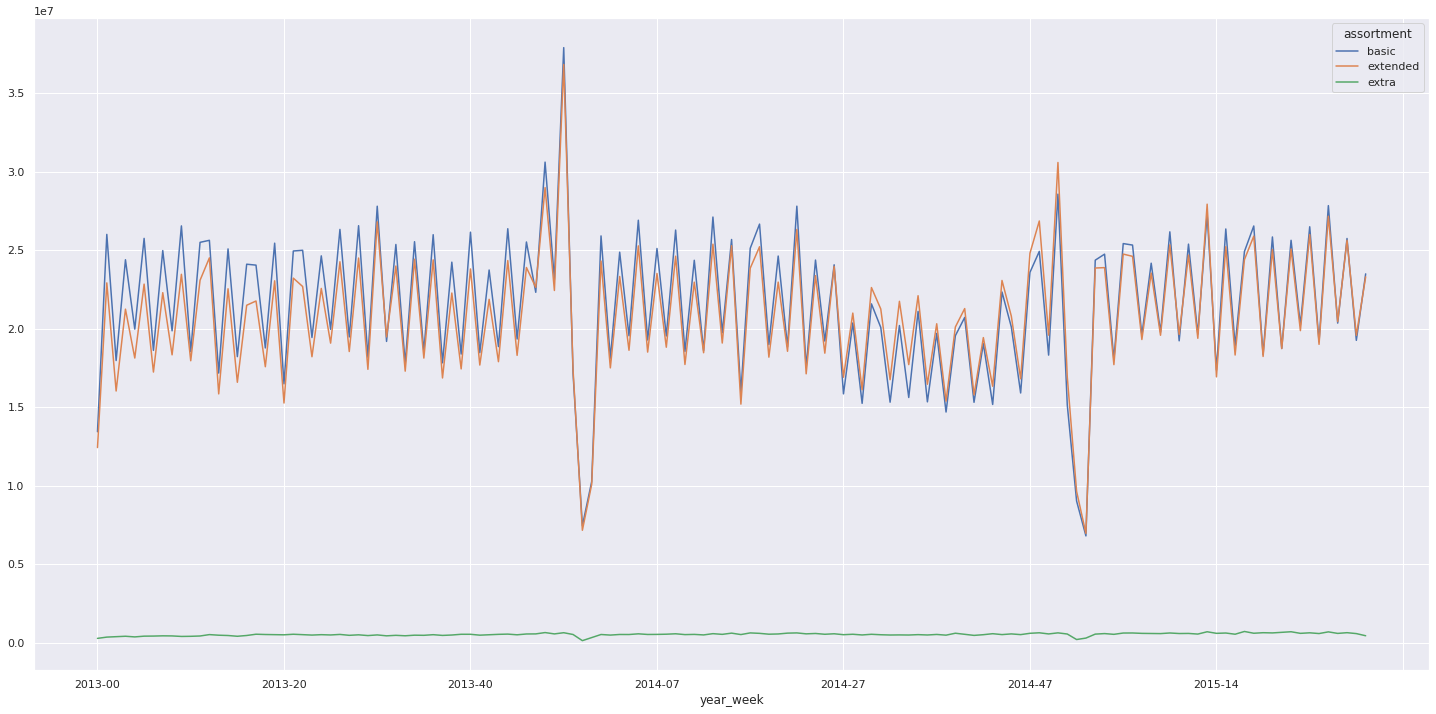

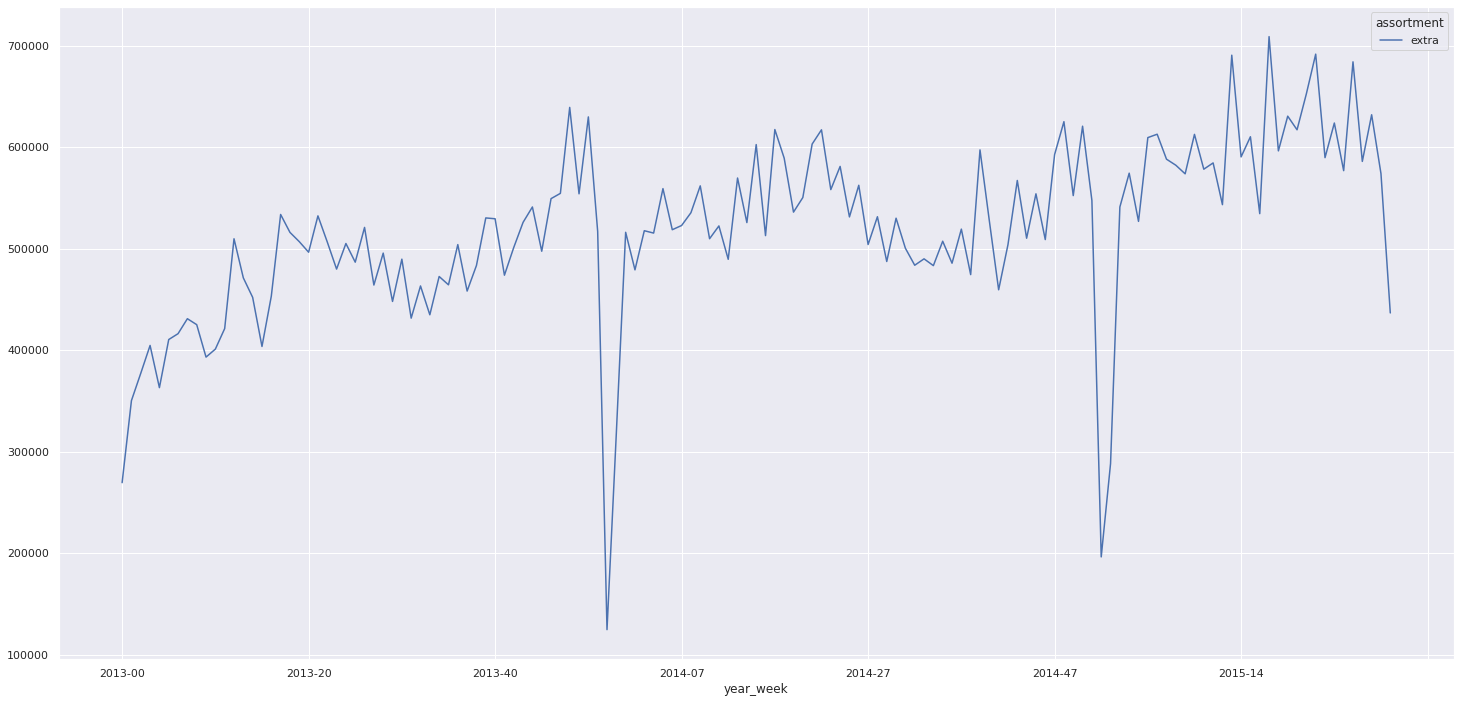

In [33]:
aux1= df4[['assortment','sales']].groupby('assortment').sum().reset_index()
sns.barplot(x='assortment', y ='sales', data= aux1);

aux2= df4[['year_week','assortment','sales']].groupby(['year_week','assortment']).sum().reset_index()
aux2.pivot(index = 'year_week',columns='assortment', values='sales').plot()

aux3 = aux2[aux2['assortment'] =='extra']
aux3.pivot(index = 'year_week', columns='assortment', values='sales').plot()

#### H2. Lojas com competidores mais próximos deveriam vender menos.

**FALSA** LOjas com COMPETIDORES MAIS PROXIMOS vendem MAIS.


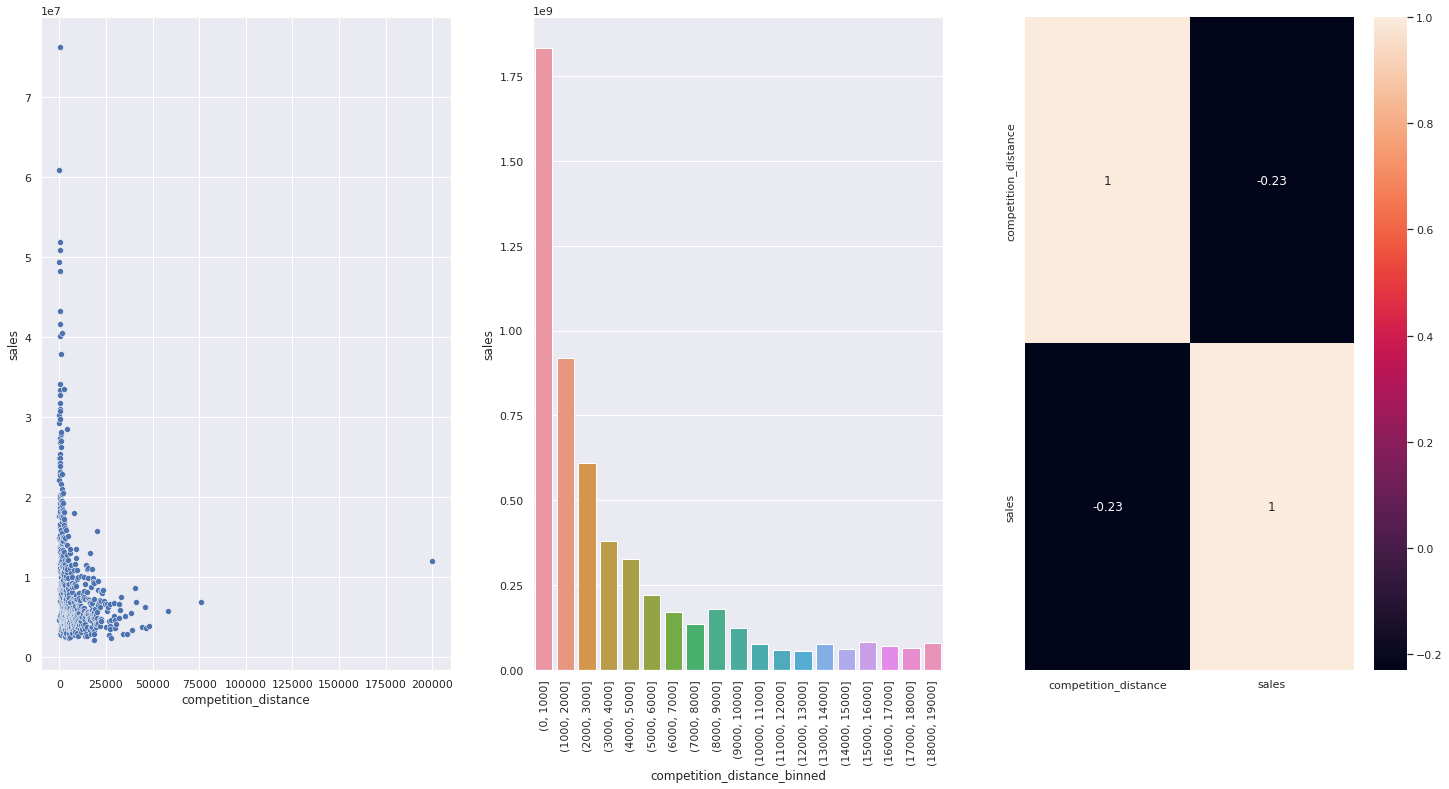

In [34]:
aux1 = df4[['competition_distance','sales']].groupby ('competition_distance').sum().reset_index()

plt.subplot(131)
sns.scatterplot(x='competition_distance', y= 'sales', data = aux1)

plt.subplot(132)

bins = list( np.arange(0, 20000, 1000) )
aux1['competition_distance_binned'] = pd.cut( aux1['competition_distance'], bins= bins)
aux2 = aux1[['competition_distance_binned','sales']].groupby('competition_distance_binned').sum().reset_index()
sns.barplot( x = 'competition_distance_binned', y='sales', data = aux2)
plt.xticks(rotation=90)

plt.subplot(133)

sns.heatmap( aux1.corr(method='pearson'), annot=True);

#### H3. Lojas com competidores à mais tempo deveriam vendem mais.

**Falsa** Lojas com competidores a MAIS tempo vendem MENOS



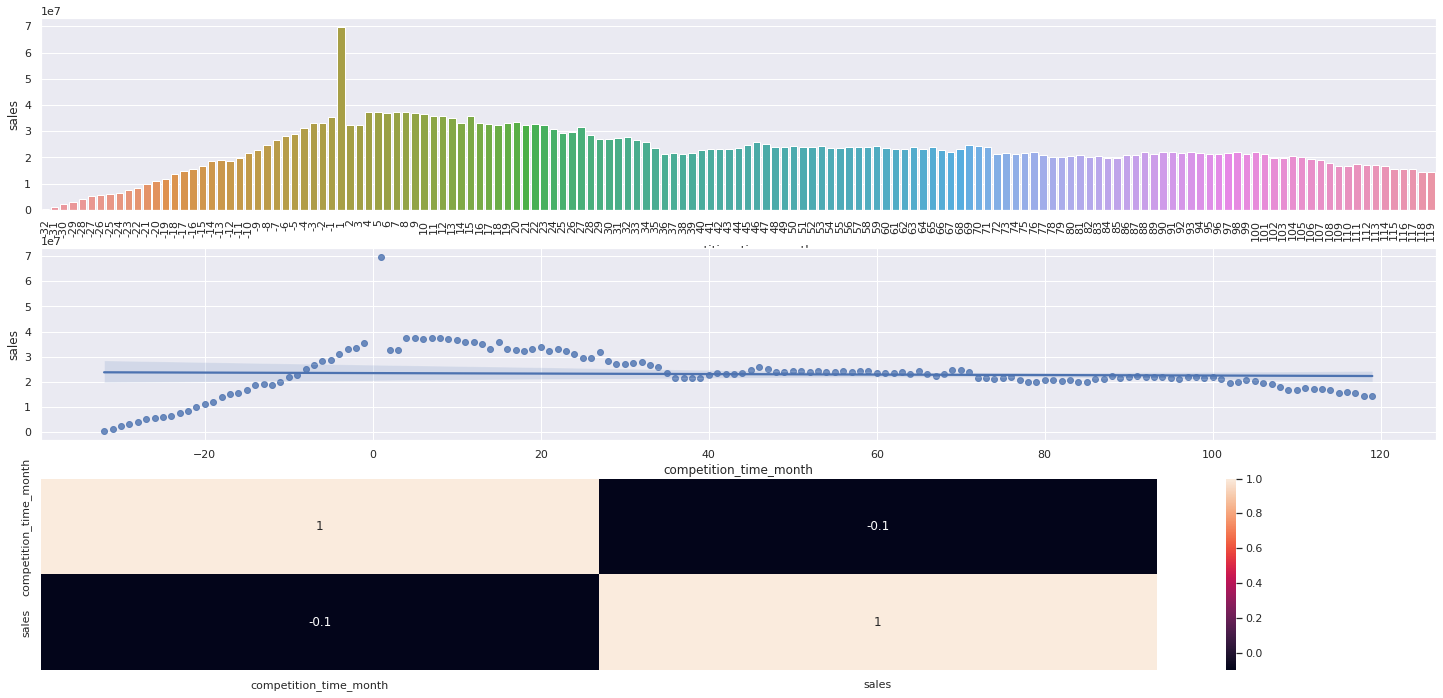

In [35]:
plt.subplot(311)
aux1=df4[['competition_time_month','sales']].groupby('competition_time_month').sum().reset_index()
aux2 = aux1[(aux1['competition_time_month'] < 120) & (aux1['competition_time_month'] != 0)]
sns.barplot(x='competition_time_month', y='sales', data= aux2)
plt.xticks(rotation=90);

plt.subplot(312)
sns.regplot(x='competition_time_month', y='sales', data= aux2)

plt.subplot(313)
sns.heatmap( aux1.corr(method='pearson'),annot=True);


In [36]:
aux1['competition_time_month'].sample(5)

326     633
112      80
259     228
223     191
367    1393
Name: competition_time_month, dtype: int64

#### H4. Lojas com promoções ativas por mais tempo deveriam vender mais.

**FALSA** Lojas com promoçoes ativas por MAIS tempo vendem MENOS, depois de um certo periodo de promoção.


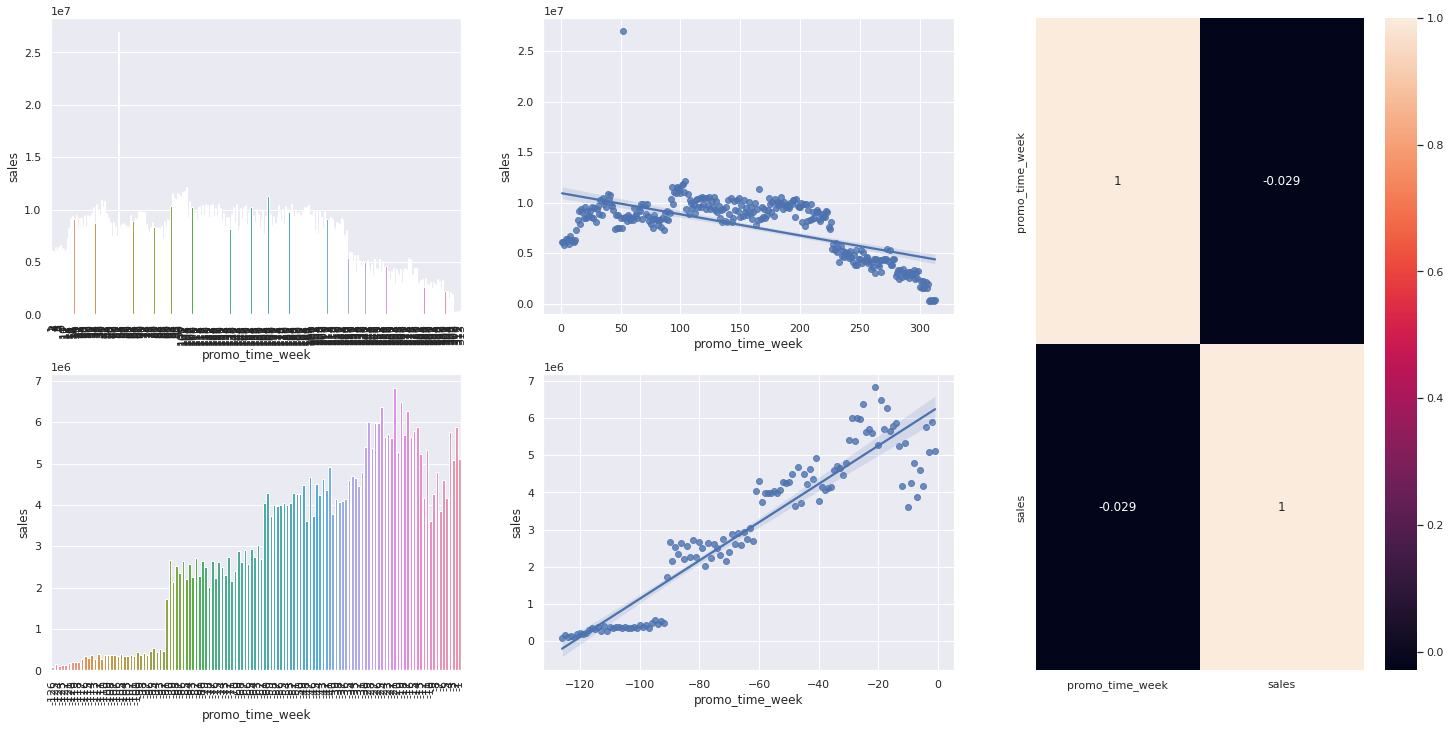

In [55]:
aux1 = df4[['promo_time_week','sales']].groupby( 'promo_time_week').sum().reset_index()
sns.barplot(x='promo_time_week', y='sales', data= aux1)

grid = GridSpec(2,3)

plt.subplot( grid[0,0])
aux2 = aux1[aux1['promo_time_week'] > 0 ]
sns.barplot(x='promo_time_week', y='sales', data= aux2)
plt.xticks(rotation=90);

plt.subplot(grid[0,1])

sns.regplot(x='promo_time_week', y='sales', data= aux2)

plt.subplot(grid[1,0])

aux3 = aux1[aux1['promo_time_week'] < 0 ]
sns.barplot(x='promo_time_week', y='sales', data= aux3)
plt.xticks(rotation=90);



plt.subplot(grid [1,1])
sns.regplot(x='promo_time_week', y='sales', data= aux3);


plt.subplot(grid [:,2])

sns.heatmap( aux1.corr( method='pearson'),annot=True);



#### <s> 5. Lojas com mais dias de promoção deveriam vender mais. </s>



#### 7. Lojas com mais promoções consecutivas deveriam vender mais.

**FALSA** Lojas com MAIS promoçoes concecutias devem vende MENOS.

In [74]:
df4[['promo', 'promo2','sales']].groupby(['promo','promo2']).sum().reset_index()

,promo,promo2,sales
0,0,0,1482612096
1,0,1,1289362241
2,1,0,1628930532
3,1,1,1472275754


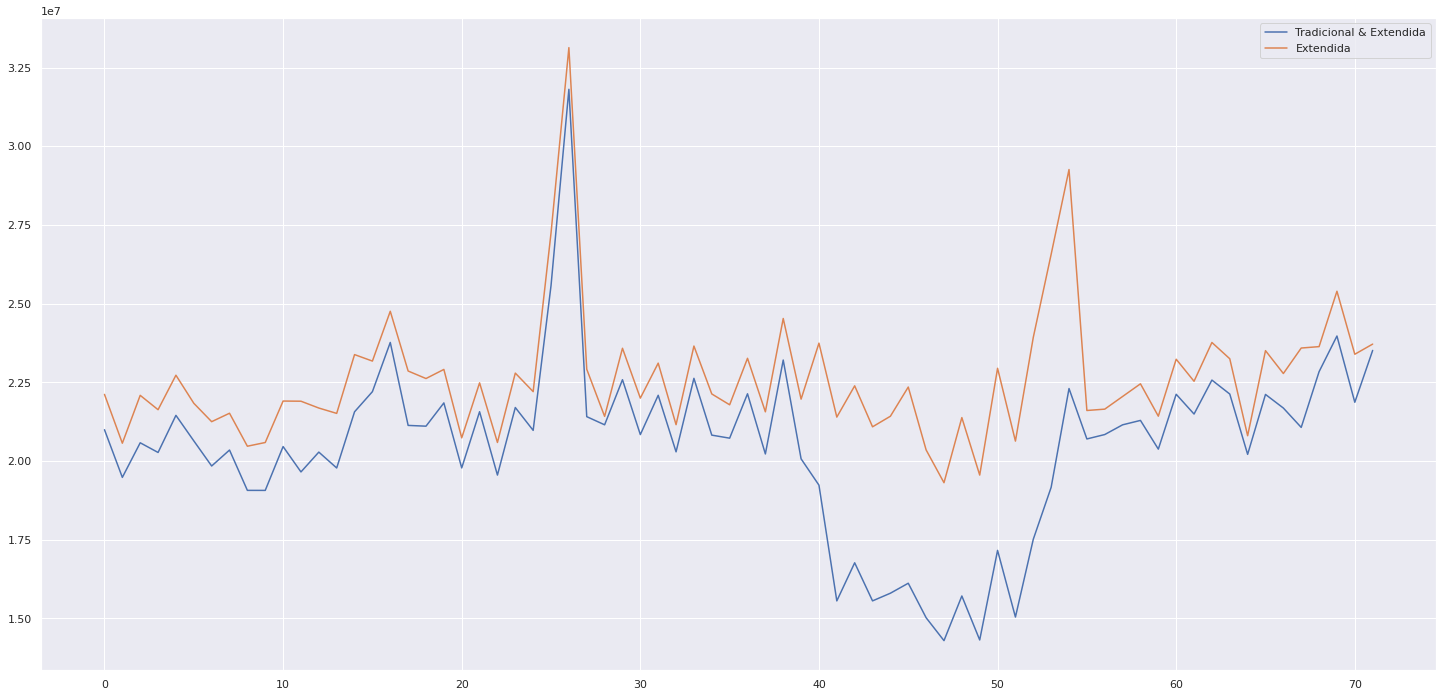

In [69]:
aux1 = df4[(df4['promo'] == 1) & (df4['promo2'] == 1)][['year_week', 'sales']].groupby('year_week').sum().reset_index()
ax = aux1.plot()

aux2 = df4[(df4['promo'] == 1) & (df4['promo2'] == 0)][['year_week', 'sales']].groupby('year_week').sum().reset_index()
aux2.plot( ax = ax)

ax.legend( labels=['Tradicional & Extendida', 'Extendida'])

#### 8. H Lojas abertas durante o feriado de Natal deveriam vender mais.

***FALSA*** Lojas abertas durante o natal VENDEM MENOS




In [75]:
aux= df4[df4['state_holiday'] != 'regular_day']

<AxesSubplot:xlabel='year', ylabel='sales'>

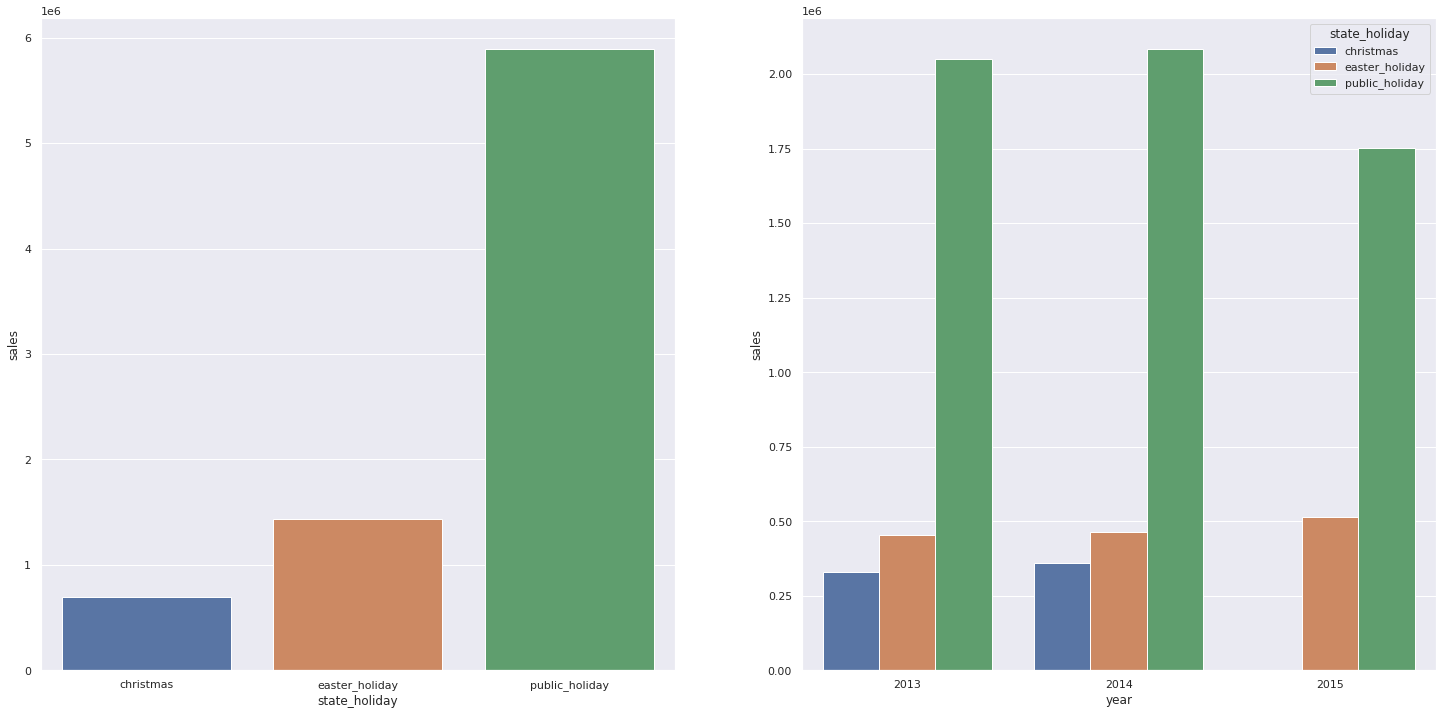

In [83]:

aux1 = aux[['state_holiday','sales']].groupby('state_holiday').sum().reset_index()

plt.subplot(121)
sns.barplot(x='state_holiday', y ='sales', data = aux1)


plt.subplot(122)

aux2 = aux[['year','state_holiday','sales']].groupby(['year','state_holiday']).sum().reset_index()
sns.barplot(x='year', y ='sales', hue='state_holiday', data = aux2)


#### H9. Lojas deveriam vender mais ao longo dos anos.
**Falsa** Lojas vendem MENOS ao longo dos anos.

<AxesSubplot:>

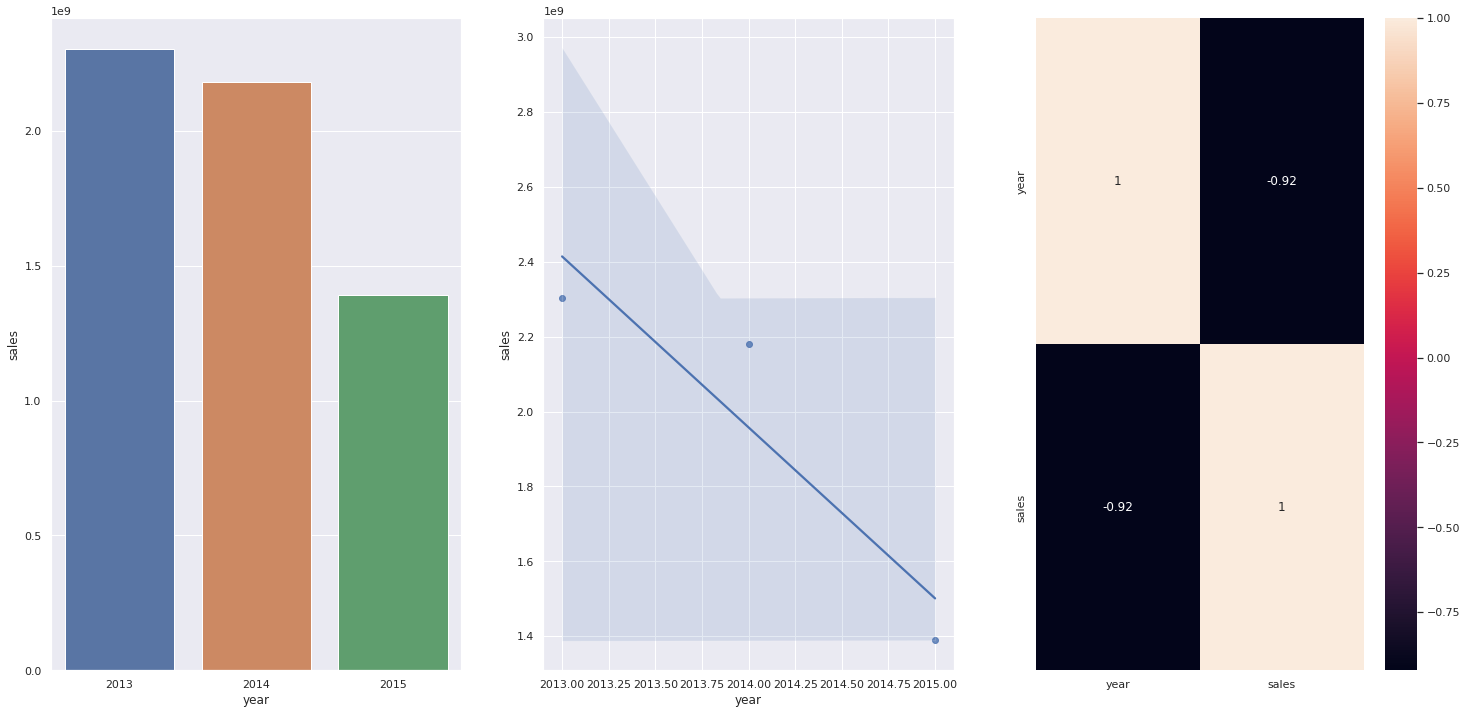

In [90]:
aux= df4[['year','sales']].groupby('year').sum().reset_index()

plt.subplot(131)
sns.barplot(x='year', y='sales', data = aux)

plt.subplot(132)
sns.regplot(x='year',y='sales', data = aux)

plt.subplot(133)
sns.heatmap(aux.corr(method='pearson'), annot=True)

#### H10. Lojas deveriam vender mais no segundo semestre do ano.

**FAlSA** Lojas vendem MENOS no segundo semestre do ano.



<AxesSubplot:>

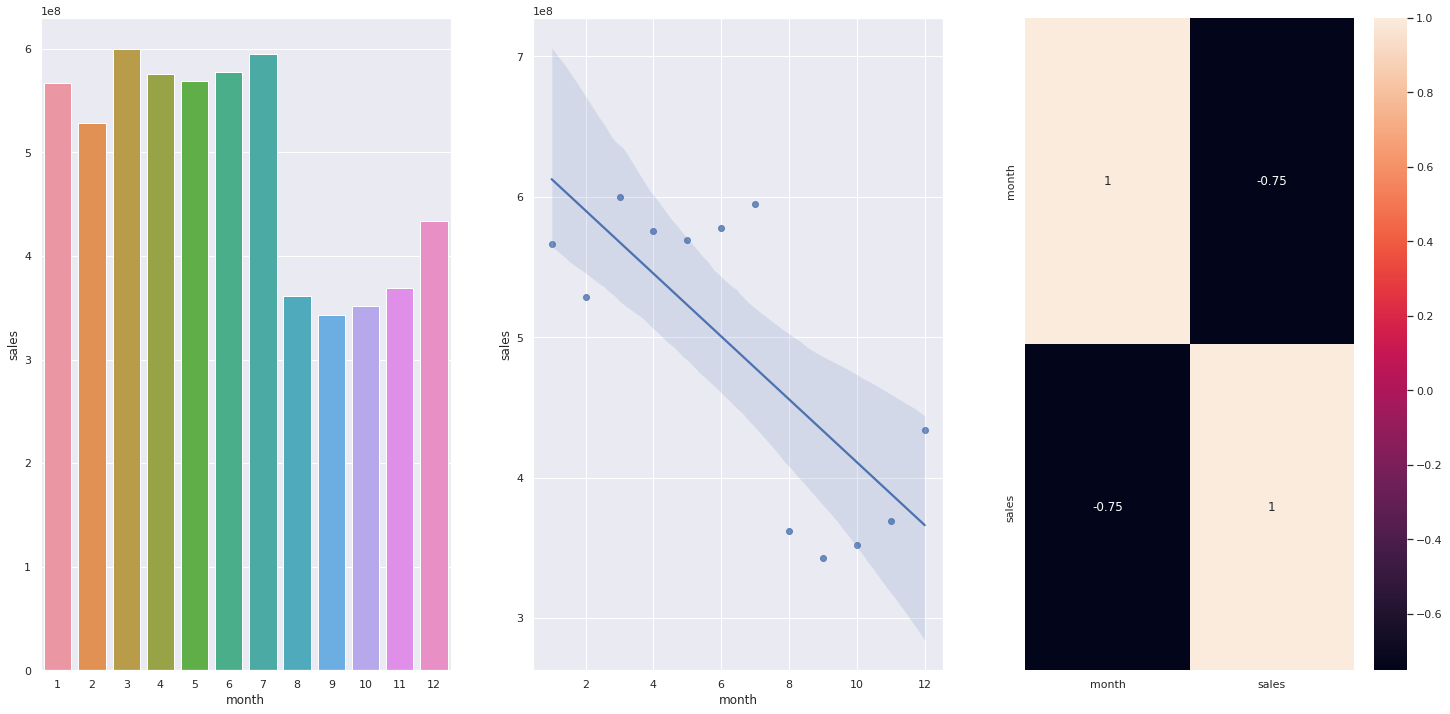

In [89]:
aux= df4[['month','sales']].groupby('month').sum().reset_index()

plt.subplot(131)
sns.barplot(x='month', y='sales', data = aux)

plt.subplot(132)
sns.regplot(x='month',y='sales', data = aux)


plt.subplot(133)
sns.heatmap(aux.corr(method='pearson'), annot=True)

#### H11. Lojas deveriam vender mais depois do dia 10 de cada mês.

**verdadeira** Lojas vendem MAIS depois do 10° dia do mês


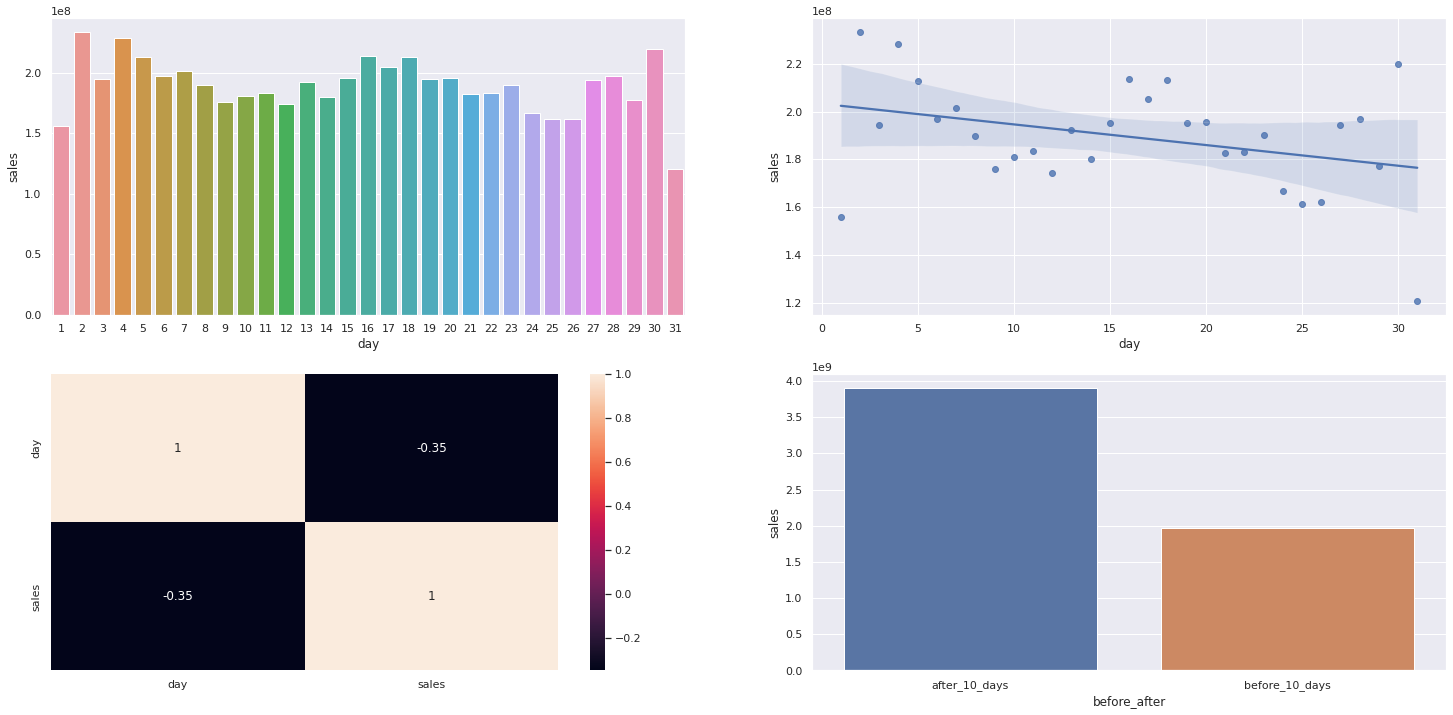

In [100]:
aux= df4[['day','sales']].groupby('day').sum().reset_index()

plt.subplot(221)
sns.barplot(x='day', y='sales', data = aux)

plt.subplot(222)
sns.regplot(x='day',y='sales', data = aux)


plt.subplot(223)
sns.heatmap(aux.corr(method='pearson'), annot=True)

aux['before_after'] = aux['day'].apply(lambda x:'before_10_days' if x <= 10 else 'after_10_days')


plt.subplot(224)
aux1 = aux[['before_after','sales']].groupby('before_after').sum().reset_index()
sns.barplot(x='before_after',y='sales', data = aux1);


#### H12. Lojas deveriam vender menos aos finais de semana.

**VERDADEIRA** Lojas vendem MENOS aos finais de semana


<AxesSubplot:>

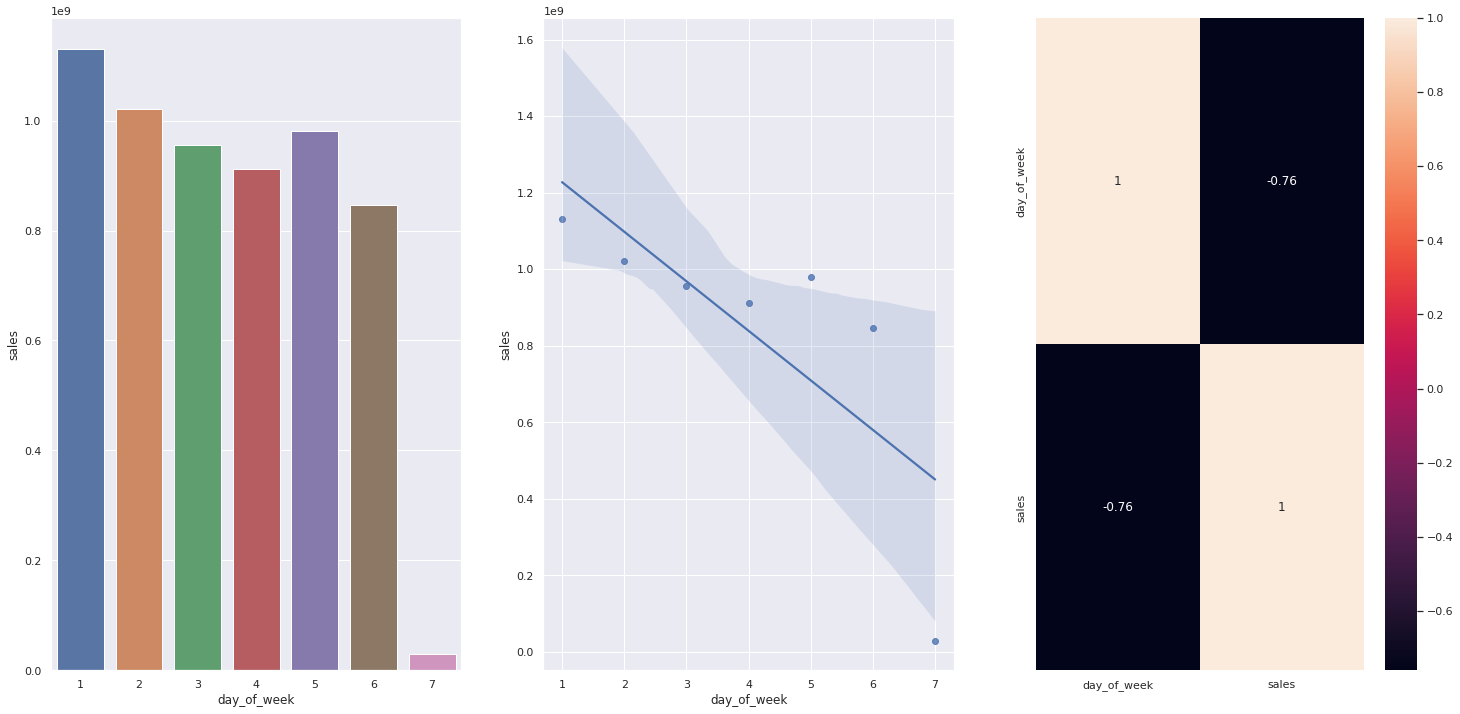

In [101]:
aux= df4[['day_of_week','sales']].groupby('day_of_week').sum().reset_index()

plt.subplot(131)
sns.barplot(x='day_of_week', y='sales', data = aux)

plt.subplot(132)
sns.regplot(x='day_of_week',y='sales', data = aux)

plt.subplot(133)
sns.heatmap(aux.corr(method='pearson'), annot=True)

#### H13. Lojas deveriam vender menos durante os feriados escolares.

**VERDADEIRA** Lojas vendem menos durante feriados escolares, menos em Agosto.

<AxesSubplot:xlabel='month', ylabel='sales'>

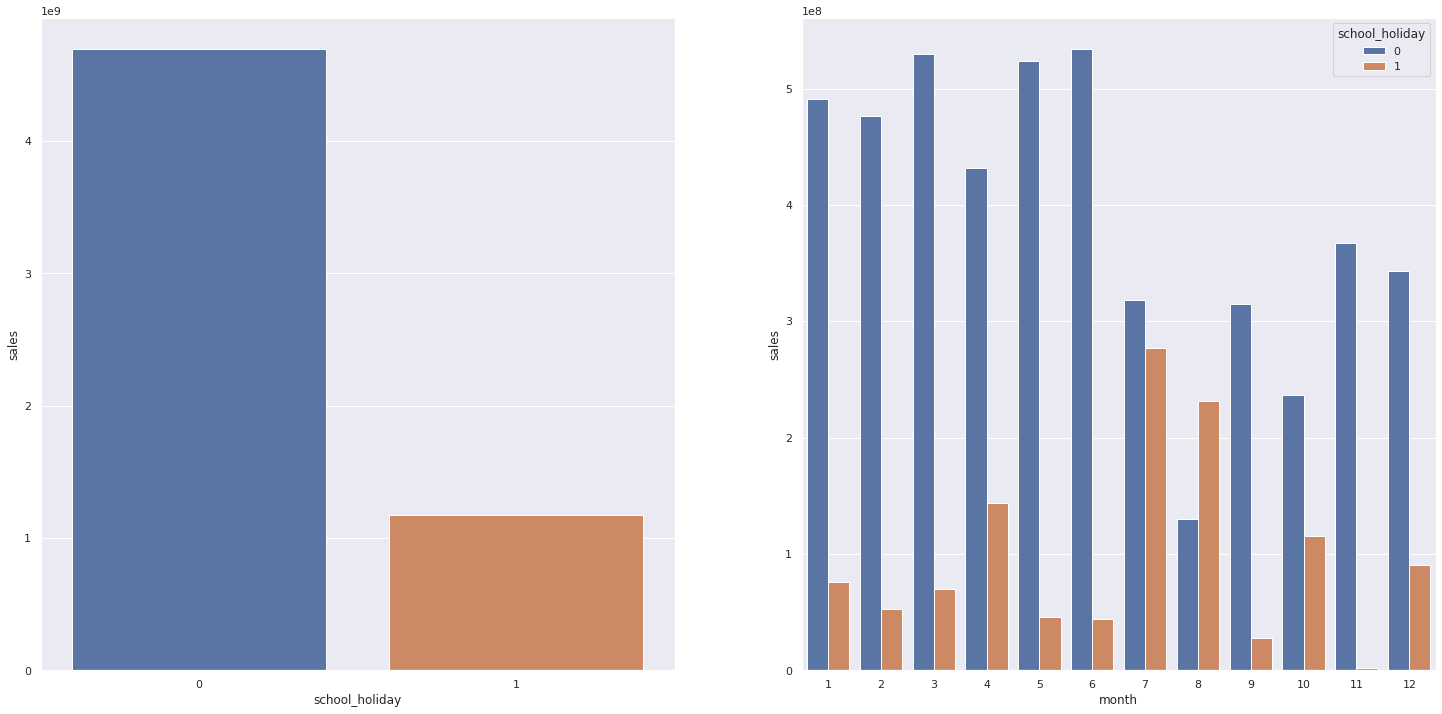

In [105]:
plt.subplot(121)
aux = df4[['school_holiday','sales']].groupby('school_holiday').sum().reset_index()
sns.barplot(x='school_holiday', y='sales', data =aux)

plt.subplot(122)
aux2 = df4[['month','school_holiday','sales']].groupby(['month','school_holiday']).sum().reset_index()
sns.barplot(x='month', y='sales', hue='school_holiday', data =aux2)

### 4.3. PASSO 04 - ANÁLISE MULTIVARIADA